# About the Data

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset provides features the houses have and the price at which they were sold.
This dataset is available at Kaggle.

id - Unique ID for each home sold 

date - Date of the home sale 

price - Price of each home sold 

bedrooms - Number of bedrooms 

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 

sqft_living - Square footage of the apartments interior living space 

sqft_lot - Square footage of the land space 

floors - Number of floors 

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment, 

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

sqft_above - The square footage of the interior housing space that is above ground level 

sqft_basement - The square footage of the interior housing space that is below ground level 

yr_built - The year the house was initially built 

yr_renovated - The year of the house’s last renovation 

zipcode - What zipcode area the house is in 

lat - Lattitude 

long - Longitude 

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn import neighbors

from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

pd.options.display.float_format = '{:.5f}'.format

In [136]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [3]:
house_data.shape

(21613, 21)

This dataset has contain 21613 observations (rows) and 21 variables(columns.)

In [4]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here the date column is an object type. We need to change it to Datetime

In [137]:
house_data['date'] = pd.to_datetime(house_data['date'])

In [8]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Ideally the sold year should be on or after the built year. Below we will check if there are any records where there is an inconsistency. In case the built year is after the sold year we will consider it as an error and Remove those columns.

In [138]:
house_data['year_sold'] = house_data['date'].dt.year
house_data.loc[house_data.year_sold < house_data.yr_built]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
1763,1832100030,2014-06-25,597326.00000,4,4.00000,3570,8250,2.00000,0,0,...,2860,710,2015,0,98040,47.57840,-122.22600,2230,10000,2014
2687,3076500830,2014-10-29,385195.00000,1,1.00000,710,6000,1.50000,0,0,...,710,0,2015,0,98144,47.57560,-122.31600,1440,4800,2014
7526,9520900210,2014-12-31,614285.00000,5,2.75000,2730,6401,2.00000,0,0,...,2730,0,2015,0,98072,47.76850,-122.16000,2520,6126,2014
8039,1250200495,2014-06-24,455000.00000,2,1.50000,1200,1259,2.00000,0,0,...,1000,200,2015,0,98144,47.60010,-122.29800,1320,1852,2014
14489,2770601530,2014-08-26,500000.00000,2,2.25000,1570,1269,2.00000,0,0,...,1280,290,2015,0,98199,47.65140,-122.38500,1570,6000,2014
17098,9126100346,2014-06-17,350000.00000,3,2.00000,1380,3600,3.00000,0,0,...,1380,0,2015,0,98122,47.60740,-122.30500,1480,3600,2014
19805,9126100765,2014-08-01,455000.00000,3,1.75000,1320,1014,3.00000,0,0,...,1320,0,2015,0,98122,47.60470,-122.30500,1380,1495,2014
20770,9310300160,2014-08-28,357000.00000,5,2.50000,2990,9240,2.00000,0,0,...,2990,0,2015,0,98133,47.73840,-122.34800,1970,18110,2014
20852,1257201420,2014-07-09,595000.00000,4,3.25000,3730,4560,2.00000,0,0,...,2760,970,2015,0,98103,47.67250,-122.33000,1800,4560,2014
20963,6058600220,2014-07-31,230000.00000,3,1.50000,1040,1264,2.00000,0,0,...,900,140,2015,0,98144,47.59510,-122.30100,1350,3000,2014


In [139]:
house_data = house_data.loc[house_data.year_sold >= house_data.yr_built]

In [140]:
house_data[house_data.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
15870,2402100895,2014-06-25,640000.00000,33,1.75000,1620,6000,1.00000,0,0,...,1040,580,1947,0,98103,47.68780,-122.33100,1330,4700,2014


This row has 33 bedrooms with sqft living area of just 1620. Looks like a typo error. we can exclude this row.

In [141]:
house_data = house_data[house_data.bedrooms != 33]

In [14]:
house_data.shape

(21600, 22)

Let's check if we have any missing values in our dataset.

In [15]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
dtype: int64

We dont have any missing data in this dataset.

In our dataset, price is the outcome variable. So let's check how other variables are related to price

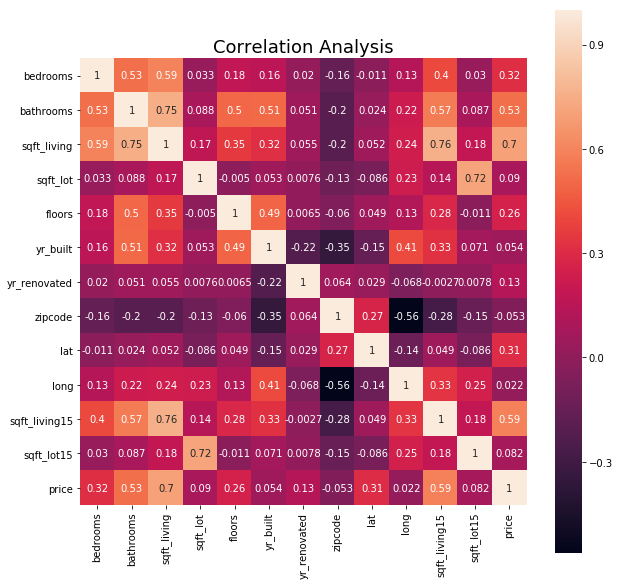

In [17]:
numerical_vars = [ 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 'yr_built','yr_renovated','zipcode','lat','long' ,'sqft_living15','sqft_lot15', 'price']
plt.figure(figsize=(10, 10))
plt.title('Correlation Analysis', fontsize=18)
sns.heatmap( house_data[numerical_vars].corr(), annot=True , square=True)

As per the correlation matrix, 
the sqft_living variable is strongly correlated to price.
the variable bathrooms and sqft_living15 are moderately correlated to price.
the variables bedrooms and lat are weakly correlated to price.

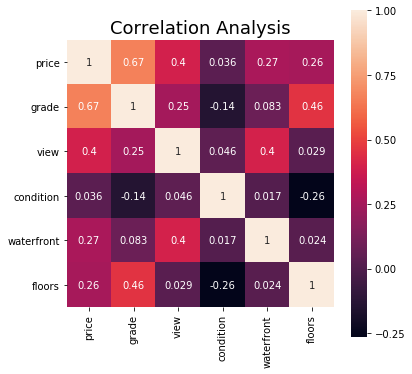

In [19]:
other_vars = ['price', 'grade', 'view','condition','waterfront','floors']
plt.figure(figsize=(6, 6))
plt.title('Correlation Analysis', fontsize=18)
sns.heatmap( house_data[other_vars].corr(), annot=True , square=True)

The grade of the house is highly correlated with the price and view of the house is moderately correlated with the price. floor and waterfront are weakly correlated with price.

# Feature engineering

Creating a data frame to hold our features. We will consider the variables which are strongly and moderately correlated to price.

In [142]:
features = house_data.loc[:,['price','sqft_living','sqft_living15','grade','bathrooms', 'bedrooms','view','floors','condition','waterfront']]

In [143]:
features['is_renovated'] = np.where(house_data.loc[:,'yr_renovated'] != 0 , 1, 0)
features['age']= house_data['year_sold'] - house_data['yr_built'] 

In [14]:
features.head()

,price,sqft_living,sqft_living15,grade,bathrooms,bedrooms,view,floors,condition,waterfront,is_renovated,age
0,221900.00000,1180,1340,7,1.00000,3,0,1.00000,3,0,0,59
1,538000.00000,2570,1690,7,2.25000,3,0,2.00000,3,0,1,63
2,180000.00000,770,2720,6,1.00000,2,0,1.00000,3,0,0,82
3,604000.00000,1960,1360,7,3.00000,4,0,1.00000,5,0,0,49
4,510000.00000,1680,1800,8,2.00000,3,0,1.00000,3,0,0,28


In [15]:
df_wide = features
df_long = pd.melt(df_wide, id_vars = 'price')

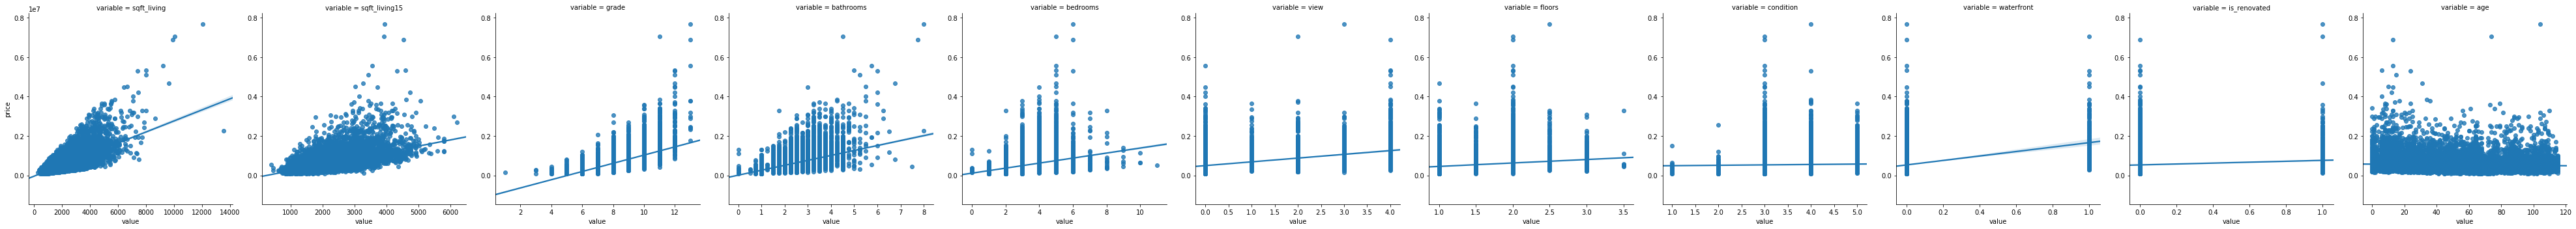

In [16]:
sns.lmplot(data = df_long,  x= 'value', y='price', col= 'variable', sharex=False )
plt.show()

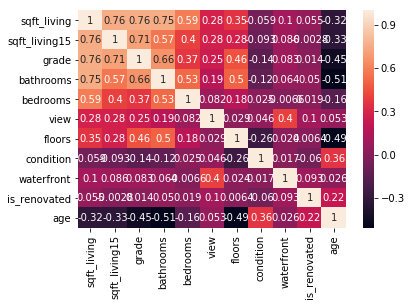


Coefficients: 
 [  1.60235499e+02   2.13087741e+01   1.20184964e+05   4.98298457e+04
  -4.11887259e+04   4.32796727e+04   2.71854056e+04   1.92587090e+04
   5.76217732e+05   1.72813674e+04   3.65195116e+03]

Intercept: 
 -1002027.05664

R-squared:
0.653273639379


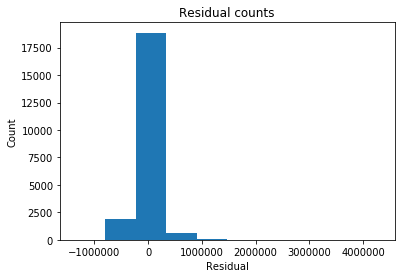

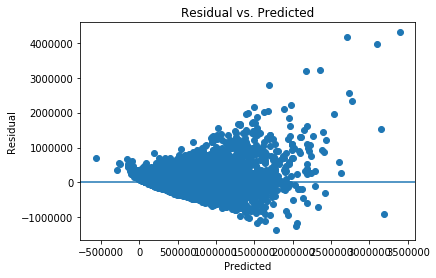

In [17]:
regr = linear_model.LinearRegression()
x = features.iloc[:,1:]
y = features['price']

sns.heatmap(x.corr(), annot=True)
plt.show()

regr.fit(x, y)
predicted = regr.predict(x)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


predicted = regr.predict(x).ravel()
actual = y
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Let's check the distribution of price

In [19]:
norm = np.random.normal(0, 1,len(features))
norm.sort()


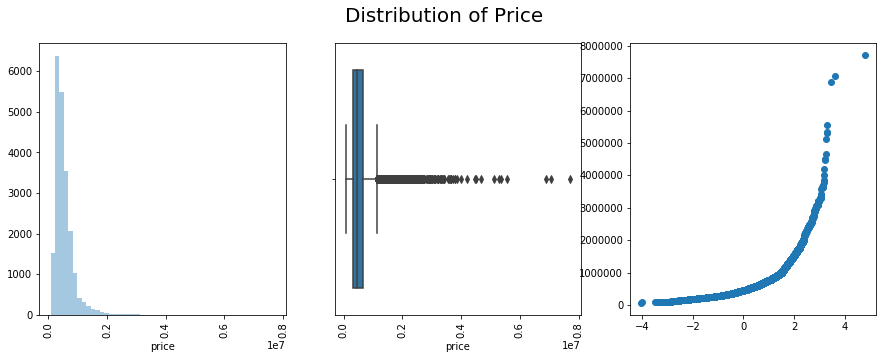

In [20]:

plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Price', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( features['price'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(features['price'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(features['price'])
plt.plot(norm, price,"o") 

plt.show()

The price deviates from the normal distribution. So normalise the price by taking a log transformation of this. 

In [144]:
features['log_tr_price'] = np.log(features['price'])

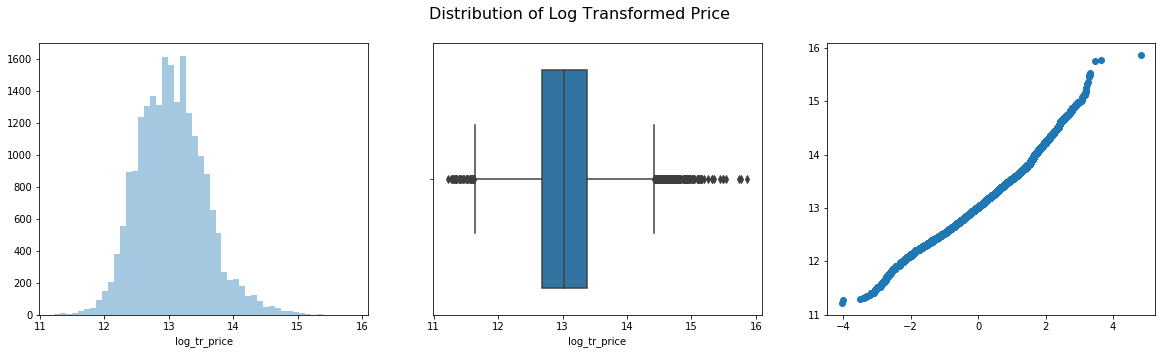

In [22]:

plt.figure(figsize=(20,5))
plt.suptitle('Distribution of Log Transformed Price', fontsize=16)
plt.subplot(1,3,1)
sns.distplot(features['log_tr_price'], kde= False)
plt.subplot(1,3,2)
sns.boxplot(features['log_tr_price'])
plt.subplot(1,3,3)
plt.plot(norm, sorted(features['log_tr_price']),"o") 

plt.show()

After taking the log transformation, the price now follows a normal distribution.

Lets analyse the distribution of sqft_living

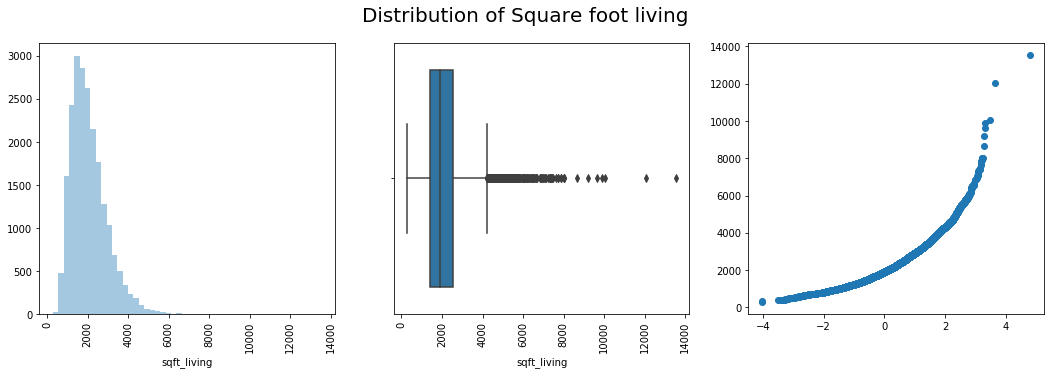

In [23]:
plt.figure(figsize=(18,5))
plt.suptitle('Distribution of Square foot living', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( features['sqft_living'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(features['sqft_living'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(features['sqft_living'])
plt.plot(norm, price,"o") 

plt.show()


The Square foot living does not follow a normal distribution. So we will normalise the sqft_living by taking a log transformation of this. Then we will analyse its relation with log transfomed price.

In [145]:
features['log_tr_sqft_living'] = np.log(features['sqft_living'])
features['log_tr_sqft_living15'] = np.log(house_data['sqft_living15'])

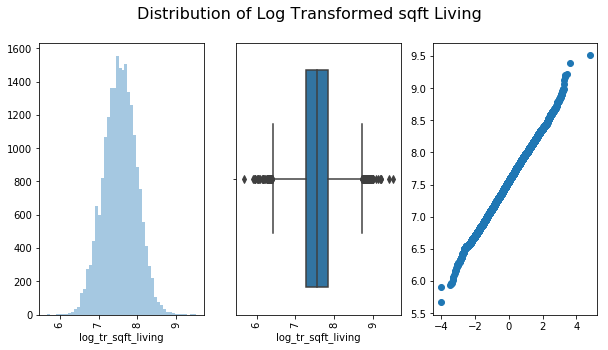

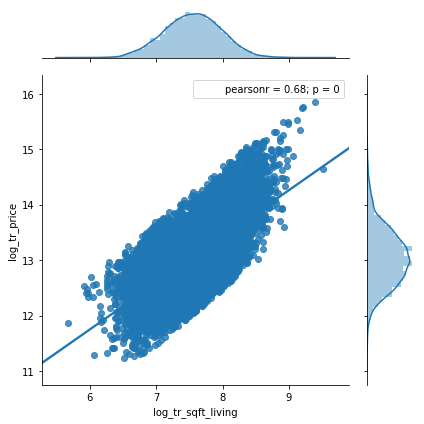

In [25]:

plt.figure(figsize=(10,5))
plt.suptitle('Distribution of Log Transformed sqft Living', fontsize=16)
plt.subplot(1,3,1)
sns.distplot( features['log_tr_sqft_living'], kde= False)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(features['log_tr_sqft_living'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sqft_living = sorted(features['log_tr_sqft_living'])
plt.plot(norm, sqft_living,"o") 

sns.jointplot(x="log_tr_sqft_living", y="log_tr_price", data=features, kind = 'reg')
plt.tight_layout()
plt.show()


In [146]:
features['bed_bath_room'] = features['bathrooms'] * features['bedrooms']

In [27]:
features.describe()

,price,sqft_living,sqft_living15,grade,bathrooms,bedrooms,view,floors,condition,waterfront,is_renovated,age,log_tr_price,log_tr_sqft_living,log_tr_sqft_living15,bed_bath_room
count,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000
mean,540124.87046,2079.85662,1986.70505,7.65644,2.11461,3.36954,0.23435,1.49389,3.40958,0.00755,0.04231,43.34134,13.04782,7.55035,7.53951,7.49509
std,367223.12900,918.28086,685.49206,1.17538,0.77008,0.90771,0.76643,0.53968,0.65078,0.08654,0.20131,29.36531,0.52680,0.42473,0.32755,4.21314
min,75000.00000,290.00000,399.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,11.22524,5.66988,5.98896,0.00000
25%,321500.00000,1430.00000,1490.00000,7.00000,1.75000,3.00000,0.00000,1.00000,3.00000,0.00000,0.00000,18.00000,12.68075,7.26543,7.30653,4.50000
50%,450000.00000,1910.00000,1840.00000,7.00000,2.25000,3.00000,0.00000,1.50000,3.00000,0.00000,0.00000,40.00000,13.01700,7.55486,7.51752,7.00000
75%,645000.00000,2550.00000,2360.00000,8.00000,2.50000,4.00000,0.00000,2.00000,4.00000,0.00000,0.00000,63.00000,13.37701,7.84385,7.76642,10.00000
max,7700000.00000,13540.00000,6210.00000,13.00000,8.00000,11.00000,4.00000,3.50000,5.00000,1.00000,1.00000,115.00000,15.85673,9.51340,8.73392,67.50000


In [20]:
grade = sorted(features.grade.unique())
print(grade)

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [147]:
features['grade_z'] = (features.grade - features.grade.min()) / (features.grade.max() - features.grade.min())

In [148]:
features['condition_z'] = (features.condition - features.condition.min()) / (features.condition.max() - features.condition.min())
print(features.condition.describe())

count   21600.00000
mean        3.40958
std         0.65078
min         1.00000
25%         3.00000
50%         3.00000
75%         4.00000
max         5.00000
Name: condition, dtype: float64


In [149]:
features['view_z'] = (features.view - features.view.min()) / (features.view.max() - features.view.min())
print(features.view_z.describe())

count   21600.00000
mean        0.05859
std         0.19161
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: view_z, dtype: float64


In [150]:
features['age_z'] = (features.age - features.age.min()) / (features.age.max() - features.age.min())
print(features.age_z.describe())

count   21600.00000
mean        0.37688
std         0.25535
min         0.00000
25%         0.15652
50%         0.34783
75%         0.54783
max         1.00000
Name: age_z, dtype: float64


In [151]:
features['floors_z'] = (features.floors - features.floors.min()) / (features.floors.max() - features.floors.min())
print(features.floors_z.describe())

count   21600.00000
mean        0.19756
std         0.21587
min         0.00000
25%         0.00000
50%         0.20000
75%         0.40000
max         1.00000
Name: floors_z, dtype: float64


In [32]:
zip = house_data.zipcode.value_counts().head(20).index.tolist()
print(zip)


[98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023, 98006, 98133, 98059, 98058, 98155, 98074, 98033, 98027, 98125, 98056, 98053]


In [152]:

zip_dummies = pd.get_dummies(house_data.zipcode, prefix='zip')
features_2 = pd.concat([features,zip_dummies], axis=1)

In [34]:
features_2[['zip_98038', 'zip_98052', 'zip_98103', 'zip_98115', 'zip_98117']].head()

,zip_98038,zip_98052,zip_98103,zip_98115,zip_98117
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [38]:
features_2.columns

Index(['price', 'sqft_living', 'sqft_living15', 'grade', 'bathrooms',
       'bedrooms', 'view', 'floors', 'condition', 'waterfront', 'is_renovated',
       'age', 'log_tr_price', 'log_tr_sqft_living', 'log_tr_sqft_living15',
       'bed_bath_room', 'grade_z', 'view_z', 'floors_z', 'zip_98001',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115

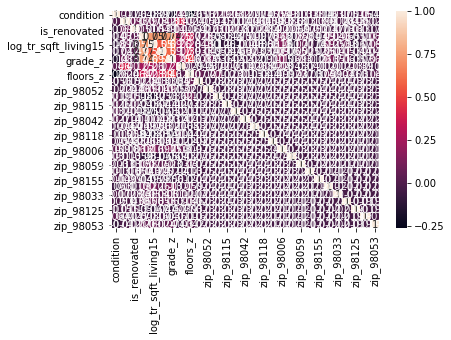


Coefficients: 
 [   57569.16822795   625890.60971755   143073.32830259    85523.30276999
    97062.7209928     11852.25840805  1666482.35207934   250877.42415559
   -74955.61405669  -158153.45354958    -1973.79860781   139267.28824958
   139730.44364726   135830.6027861   -189335.69669428    -4260.18673868
    12424.65090111  -240222.28880648    17228.74349787   -19219.61288163
  -112714.24603091  -175389.18195566   -32978.91620108   -56119.95058165
   146537.46220759   -44668.91789897    20785.07399452   -91781.20921771
    35819.83530501]

Intercept: 
 -2047586.86574

R-squared:
0.610767128566


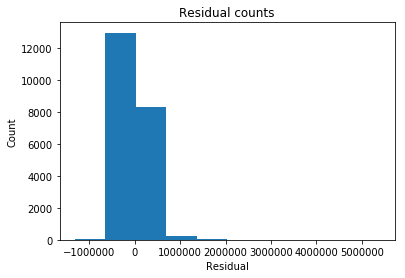

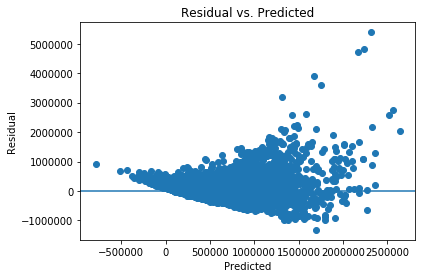

In [41]:
regr = linear_model.LinearRegression()
x = features_2[[  'condition', 'waterfront', 'is_renovated',
       'log_tr_sqft_living', 'log_tr_sqft_living15',
       'bed_bath_room', 'grade_z', 'view_z', 'floors_z', 'zip_98038',
       'zip_98052', 'zip_98103', 'zip_98115', 'zip_98117'
, 'zip_98042', 'zip_98034', 'zip_98118', 'zip_98023', 'zip_98006'               
, 'zip_98133', 'zip_98059', 'zip_98058', 'zip_98155', 'zip_98074', 
                'zip_98033', 'zip_98027', 'zip_98125', 'zip_98056', 'zip_98053']]

                
                

y = features['price']

sns.heatmap(x.corr(), annot=True)
plt.show()

regr.fit(x, y)
predicted = regr.predict(x)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


predicted = regr.predict(x).ravel()
actual = y
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()                

In [194]:
from sklearn.preprocessing import StandardScaler
features_std = pd.DataFrame(StandardScaler().fit_transform(features_2), columns =features_2.columns )

In [197]:
means = features_std[[ 'log_tr_sqft_living', 'bed_bath_room', 'grade_z','floors_z']].mean(axis=0)
stds = features_std[[ 'log_tr_sqft_living', 'bed_bath_room', 'grade_z','floors_z']].std(axis=0)
features_std['living_bedbath_grade'] = ((features_std[[ 'log_tr_sqft_living', 'bed_bath_room', 'grade_z','floors_z']] - means) / stds).mean(axis=1)
        

In [198]:
features_std['age_condition'] = features_std.age * features_std.condition_z
features_std['view_waterfront'] = features_std.view_z * features_std.waterfront

In [199]:
features_std.shape

(21600, 94)

In [200]:
features_std.drop(['log_tr_sqft_living','bed_bath_room','grade_z','floors_z','age','condition','view_z','waterfront'], axis= 1, inplace=True)

In [201]:
features_std.drop(['price','sqft_living','sqft_living15','grade','bathrooms','bedrooms','view','floors'], axis = 1, inplace = True)

In [204]:
features_std.drop(['condition_z', 'age_z'], axis= 1, inplace=True)
features_std.drop('log_tr_sqft_living15', axis= 1, inplace=True)

In [205]:
features_std.columns

Index(['is_renovated', 'log_tr_price', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155',
       'zip_98166', 'zip_98168', 'zip_98177', 'zip_98178',

In [206]:
features_std.head(2)

,is_renovated,log_tr_price,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,living_bedbath_grade,age_condition,view_waterfront
0,-0.21020,-1.40064,-0.13056,-0.09643,-0.11460,-0.12204,-0.08854,-0.15362,-0.08106,-0.11522,...,-0.10908,-0.11230,-0.10930,9.02456,-0.07960,-0.11460,-0.12185,-0.91595,-0.33562,0.02666
1,4.75735,0.28056,-0.13056,-0.09643,-0.11460,-0.12204,-0.08854,-0.15362,-0.08106,-0.11522,...,-0.10908,-0.11230,-0.10930,-0.11081,-0.07960,-0.11460,-0.12185,0.22797,-0.42136,0.02666


In [207]:
features_std.loc[:,features_std.columns != 'log_tr_price'].head(2)


,is_renovated,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,living_bedbath_grade,age_condition,view_waterfront
0,-0.21020,-0.13056,-0.09643,-0.11460,-0.12204,-0.08854,-0.15362,-0.08106,-0.11522,-0.06820,...,-0.10908,-0.11230,-0.10930,9.02456,-0.07960,-0.11460,-0.12185,-0.91595,-0.33562,0.02666
1,4.75735,-0.13056,-0.09643,-0.11460,-0.12204,-0.08854,-0.15362,-0.08106,-0.11522,-0.06820,...,-0.10908,-0.11230,-0.10930,-0.11081,-0.07960,-0.11460,-0.12185,0.22797,-0.42136,0.02666


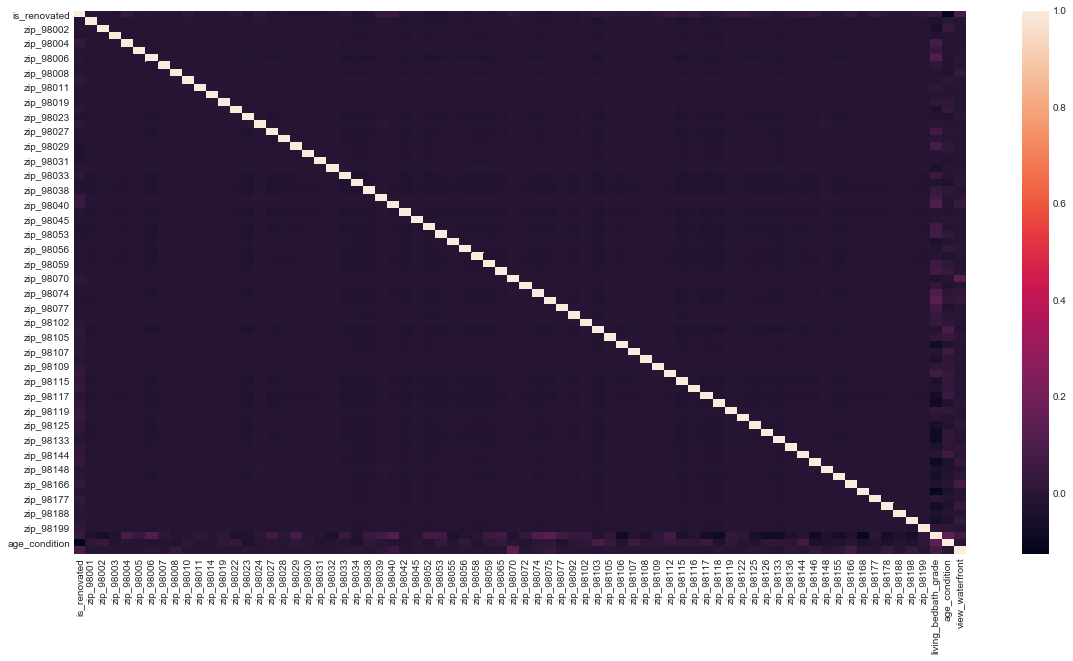


Coefficients: 
 [  3.93226985e-02  -4.26651373e+10  -3.17545254e+10  -3.75953966e+10
  -3.99676035e+10  -2.91976599e+10  -4.98813886e+10  -2.67655610e+10
  -3.77936046e+10  -2.25621917e+10  -3.14367019e+10  -2.51101666e+10
  -3.10346741e+10  -3.44057948e+10  -4.99302621e+10  -2.03149429e+10
  -4.54627440e+10  -3.77936046e+10  -4.02151949e+10  -3.59683026e+10
  -3.71956402e+10  -2.52106270e+10  -4.65311559e+10  -5.21240231e+10
  -5.41752703e+10  -1.59724190e+10  -3.76615881e+10  -5.22635631e+10
  -3.34465930e+10  -5.34559843e+10  -4.50823220e+10  -3.67913089e+10
  -4.51368800e+10  -4.77278199e+10  -4.83899621e+10  -3.95303566e+10
  -2.44985519e+10  -3.70613788e+10  -4.70033615e+10  -4.24909810e+10
  -3.16753797e+10  -4.20227879e+10  -2.31166783e+10  -5.45752147e+10
  -3.40402090e+10  -4.10692859e+10  -3.66554891e+10  -3.07091238e+10
  -2.35506889e+10  -3.68590216e+10  -5.38619031e+10  -4.07664383e+10
  -5.24952152e+10  -5.03677780e+10  -3.04625965e+10  -3.81215370e+10
  -4.53544037e+10

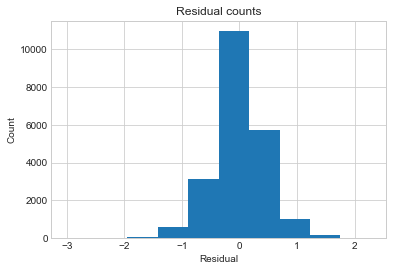

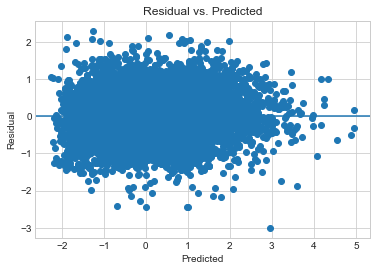

In [208]:
regr = linear_model.LinearRegression()
x = features_std.loc[:,features_std.columns != 'log_tr_price'] 
                
# removed 'log_tr_sqft_living15', as it was having high correlation with 'log_tr_sqft_living'
# instead of  'log_tr_sqft_living', 'bed_bath_room', 'grade_z' took living_bedbath_grade
y = features_std['log_tr_price']
plt.figure(figsize= (20,10))
sns.heatmap(x.corr())
plt.show()

regr.fit(x, y)
predicted = regr.predict(x)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


predicted = regr.predict(x).ravel()
actual = y
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()                

In [209]:
from sklearn.model_selection import train_test_split

x = features_std.loc[:,features_std.columns != 'log_tr_price'] 
y = features_std['log_tr_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

In [210]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

# Get score for training data
print('With 30% holdout Regression score - training data:', lm.score(x_train, y_train))

# Get score for test data
print('With 30% holdout Regression score - test data:', lm.score(x_test, y_test))

With 30% holdout Regression score - training data: 0.802860661442
With 30% holdout Regression score - test data: 0.803232475845


In [211]:
ten_fold = cross_val_score(lm, x, y, cv=10)
print(ten_fold)
print("The Average Accuracy : " , ten_fold.mean())
print("Standard Deviation : " , ten_fold.std())

[ 0.81027436  0.80948581  0.80539823  0.80390504  0.79008786  0.81257726
  0.80871005  0.82232336  0.8126097   0.68002026]
The Average Accuracy :  0.795539192734
Standard Deviation :  0.0392755929731


In [212]:
features_std.columns

Index(['is_renovated', 'log_tr_price', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155',
       'zip_98166', 'zip_98168', 'zip_98177', 'zip_98178',

In [213]:
import statsmodels.formula.api as smf

linear_formula = 'log_tr_price ~ is_renovated+ zip_98001+ zip_98002+ zip_98003+\
zip_98004+ zip_98005+ zip_98006+ zip_98007+ zip_98008+zip_98010+ zip_98011+ zip_98014+ zip_98019+ zip_98022+\
zip_98023+ zip_98024+ zip_98027+ zip_98028+ zip_98029+zip_98030+ zip_98031+ zip_98032+ zip_98033+ zip_98034+\
zip_98038+ zip_98039+ zip_98040+ zip_98042+ zip_98045+zip_98052+ zip_98053+ zip_98055+ zip_98056+ zip_98058+\
zip_98059+ zip_98065+ zip_98070+ zip_98072+ zip_98074+zip_98075+ zip_98077+ zip_98092+ zip_98102+ zip_98103+\
zip_98105+ zip_98106+ zip_98107+ zip_98108+ zip_98109+zip_98112+ zip_98115+ zip_98116+ zip_98117+ zip_98118+\
zip_98119+ zip_98122+ zip_98125+ zip_98126+ zip_98133+zip_98136+ zip_98144+ zip_98146+ zip_98148+ zip_98155+\
zip_98166+ zip_98168+ zip_98177+ zip_98178+ zip_98188+zip_98198+ zip_98199+ living_bedbath_grade+ age_condition+\
view_waterfront'
    
# run validation
lm = smf.ols(formula=linear_formula, data=features_std).fit()

print('coefficients: \n')
print(lm.params)
print()
print('P-Values: \n')
print(lm.pvalues)
print()
print('R2 Value: \n')
print(lm.rsquared)

coefficients: 

Intercept                       -0.02487
is_renovated                     0.03941
zip_98001              36800612913.72681
zip_98002              27389716061.32826
zip_98003              32427731935.21192
zip_98004              34473867813.21394
zip_98005              25184303796.18458
zip_98006              43024956423.30348
zip_98007              23086508366.12498
zip_98008              32598695311.39129
zip_98010              19460911979.27840
zip_98011              27115578862.27590
zip_98014              21658655755.16858
zip_98019              26768811685.93416
zip_98022              29676556000.23984
zip_98023              43067112019.39459
zip_98024              17522558179.18774
zip_98027              39213675310.33199
zip_98028              32598695311.32932
zip_98029              34687426632.64164
zip_98030              31024289703.56147
zip_98031              32082923981.14954
zip_98032              21745307388.04618
zip_98033              40135228996.00069


Looking at the p value The below zip codes have higher p_value threshold.  zip_98006,zip_98010,zip_98011,zip_98014,zip_98024,zip_98028,zip_98033,zip_98105,zip_98108,zip_98116,zip_98118,zip_98119,
zip_98122,zip_98125,zip_98126,zip_98133,zip_98144,zip_98146,zip_98148,zip_98155,zip_98178,zip_98188,zip_98198 
so can remove them. 

In [214]:
features_std.drop(['zip_98006','zip_98010','zip_98011','zip_98014','zip_98024','zip_98028','zip_98033','zip_98105',
'zip_98108','zip_98116','zip_98118','zip_98119','zip_98122','zip_98125','zip_98126','zip_98133','zip_98144','zip_98146',
                   'zip_98148','zip_98155','zip_98178','zip_98188','zip_98198']    , axis= 1, inplace=True)


In [215]:
features_std.shape

(21600, 52)

In [216]:
features_std.columns

Index(['is_renovated', 'log_tr_price', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98007', 'zip_98008', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98027', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98106', 'zip_98107',
       'zip_98109', 'zip_98112', 'zip_98115', 'zip_98117', 'zip_98136',
       'zip_98166', 'zip_98168', 'zip_98177', 'zip_98199',
       'living_bedbath_grade', 'age_condition', 'view_waterfront'],
      dtype='object')

In [217]:
import statsmodels.formula.api as smf

linear_formula = 'log_tr_price ~ is_renovated+  zip_98001+ zip_98002+ zip_98003+\
zip_98004+ zip_98005+  zip_98007+ zip_98008 + zip_98019+ zip_98022+\
zip_98023+  zip_98027+  zip_98029+zip_98030+ zip_98031+ zip_98032+ zip_98034+\
zip_98038+ zip_98039+ zip_98040+ zip_98042+ zip_98045+zip_98052+ zip_98053+ zip_98055+ zip_98056+ zip_98058+\
zip_98059+ zip_98065+ zip_98070+ zip_98072+ zip_98074+zip_98075+ zip_98077+ zip_98092+ zip_98102+ zip_98103+\
 zip_98106+ zip_98107+zip_98112+ zip_98115+  zip_98117+ \
zip_98136+ \
zip_98166+ zip_98168+ zip_98177+  zip_98199+ living_bedbath_grade+ age_condition+\
view_waterfront'
    
# run validation
lm = smf.ols(formula=linear_formula, data=features_std).fit()

print('coefficients: \n')
print(lm.params)
print()
print('P-Values: \n')
print(lm.pvalues)
print()
print('R2 Value: \n')
print(lm.rsquared)

coefficients: 

Intercept              -0.02656
is_renovated            0.04706
zip_98001              -0.13055
zip_98002              -0.10658
zip_98003              -0.10357
zip_98004               0.15985
zip_98005               0.05606
zip_98007               0.02255
zip_98008               0.04388
zip_98019              -0.04185
zip_98022              -0.07451
zip_98023              -0.15111
zip_98027               0.00106
zip_98029              -0.00347
zip_98030              -0.10353
zip_98031              -0.09867
zip_98032              -0.07622
zip_98034               0.00975
zip_98038              -0.12539
zip_98039               0.08285
zip_98040               0.10529
zip_98042              -0.13828
zip_98045              -0.03110
zip_98052               0.03708
zip_98053               0.02998
zip_98055              -0.08284
zip_98056              -0.05078
zip_98058              -0.09368
zip_98059              -0.04991
zip_98065              -0.03378
zip_98070              -

In [218]:
features_std.drop(['zip_98027','zip_98029']    , axis= 1, inplace=True)

In [219]:
import statsmodels.formula.api as smf

linear_formula = 'log_tr_price ~ is_renovated+  zip_98001+ zip_98002+ zip_98003+\
zip_98004+ zip_98005+  zip_98007+ zip_98008 + zip_98019+ zip_98022+\
zip_98023+  zip_98030+ zip_98031+ zip_98032+ zip_98034+\
zip_98038+ zip_98039+ zip_98040+ zip_98042+ zip_98045+zip_98052+ zip_98053+ zip_98055+ zip_98056+ zip_98058+\
zip_98059+ zip_98065+ zip_98070+  zip_98072+  zip_98074+zip_98075+ zip_98077+ zip_98092+ zip_98102+ zip_98103+\
 zip_98106+ zip_98107+zip_98112+ zip_98115+  zip_98117+ \
zip_98136+ \
zip_98166+ zip_98168+ zip_98177+  zip_98199+ living_bedbath_grade+ age_condition+\
view_waterfront'
    
# run validation
lm = smf.ols(formula=linear_formula, data=features_std).fit()

print('coefficients: \n')
print(lm.params)
print()
print('P-Values: \n')
print(lm.pvalues)
print()
print('R2 Value: \n')
print(lm.rsquared)

coefficients: 

Intercept              -0.02657
is_renovated            0.04716
zip_98001              -0.13045
zip_98002              -0.10651
zip_98003              -0.10347
zip_98004               0.15997
zip_98005               0.05614
zip_98007               0.02263
zip_98008               0.04397
zip_98019              -0.04177
zip_98022              -0.07444
zip_98023              -0.15098
zip_98030              -0.10343
zip_98031              -0.09857
zip_98032              -0.07616
zip_98034               0.00988
zip_98038              -0.12523
zip_98039               0.08290
zip_98040               0.10541
zip_98042              -0.13815
zip_98045              -0.03101
zip_98052               0.03723
zip_98053               0.03012
zip_98055              -0.08275
zip_98056              -0.05067
zip_98058              -0.09356
zip_98059              -0.04977
zip_98065              -0.03365
zip_98070              -0.01020
zip_98072               0.00701
zip_98074               

# PLSR

(21600, 91)
Index(['price', 'sqft_living', 'sqft_living15', 'grade', 'bathrooms',
       'bedrooms', 'view', 'floors', 'condition', 'waterfront', 'is_renovated',
       'age', 'log_tr_price', 'log_tr_sqft_living', 'log_tr_sqft_living15',
       'bed_bath_room', 'grade_z', 'condition_z', 'view_z', 'age_z',
       'floors_z', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052',
       'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105',
       'zip_98106', 'zip_98107', 'zip_98108', 

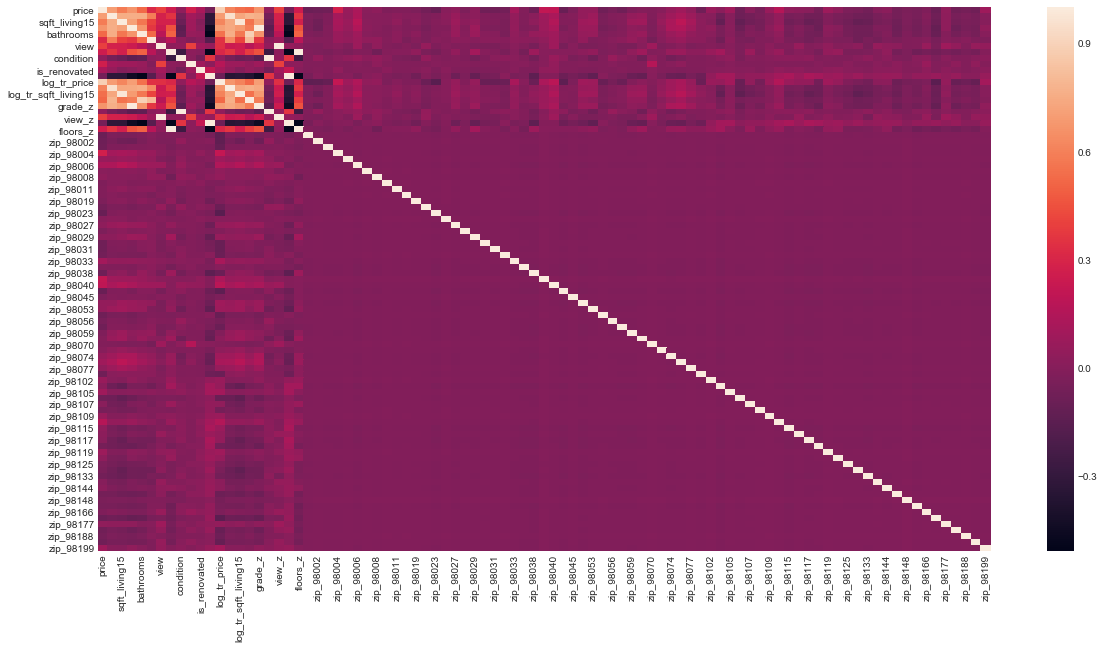

In [232]:
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns

features_std_plsr = pd.DataFrame(StandardScaler().fit_transform(features_2), columns =features_2.columns )
print(features_std_plsr.shape)
print(features_std_plsr.columns)
plt.figure(figsize=(20,10))
corrmat = features_std_plsr.corr()
sns.heatmap(corrmat)
plt.show()


In [233]:
means = features_std_plsr[[ 'log_tr_sqft_living', 'bed_bath_room', 'grade_z','floors_z']].mean(axis=0)
stds = features_std_plsr[[ 'log_tr_sqft_living', 'bed_bath_room', 'grade_z','floors_z']].std(axis=0)
features_std_plsr['living_bedbath_grade'] = ((features_std_plsr[[ 'log_tr_sqft_living', 'bed_bath_room', 'grade_z','floors_z']] - means) / stds).mean(axis=1)
features_std_plsr['age_condition'] = features_std_plsr.age * features_std_plsr.condition
features_std_plsr['view_waterfront'] = features_std_plsr.view_z * features_std_plsr.waterfront                  
                        

In [234]:
features_std_plsr.drop(['log_tr_sqft_living','bed_bath_room','grade_z','floors_z','age','condition','view_z','waterfront'], axis= 1, inplace=True)
features_std_plsr.drop(['price','sqft_living','sqft_living15','grade','bathrooms','bedrooms','view','floors'], axis = 1, inplace = True)
features_std_plsr.drop(['condition_z', 'age_z'], axis= 1, inplace=True)
features_std_plsr.drop('log_tr_sqft_living15', axis= 1, inplace=True)

In [238]:
print(features_std_plsr.columns)

Index(['is_renovated', 'log_tr_price', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155',
       'zip_98166', 'zip_98168', 'zip_98177', 'zip_98178',

(21600, 75)


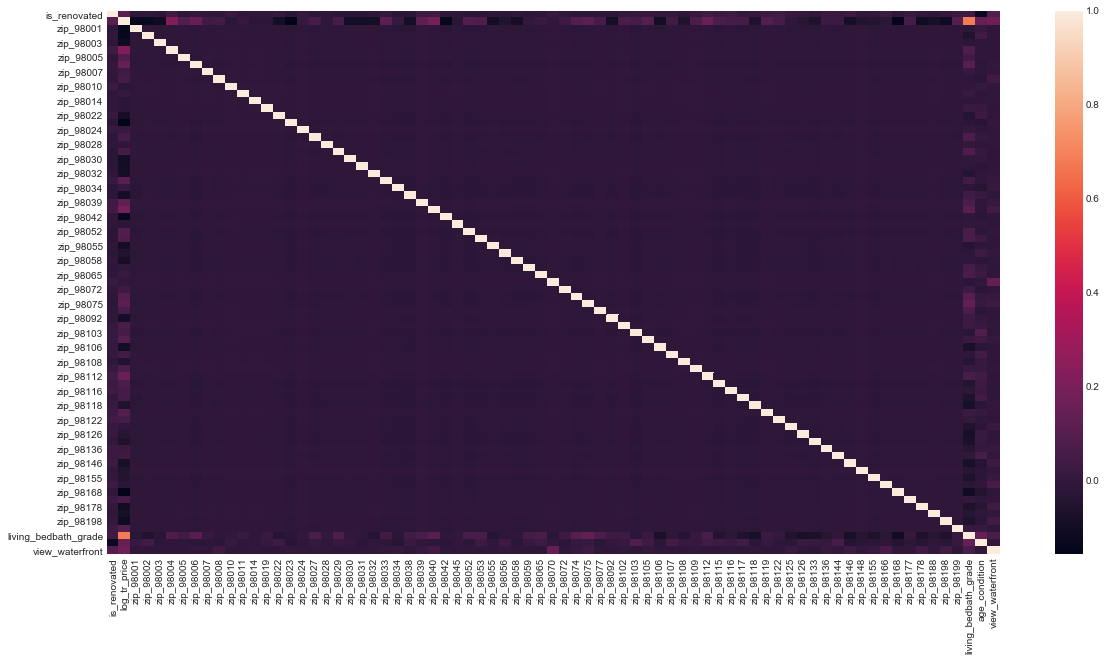

In [236]:
print(features_std_plsr.shape)

plt.figure(figsize=(20,10))
corrmat = features_std_plsr.corr()
sns.heatmap(corrmat)
plt.show()

In [250]:
x = features_std_plsr.loc[:,features_std_plsr.columns != 'log_tr_price'] 
y = features_std_plsr['log_tr_price']

plsr = PLSRegression(n_components=10)
plsr.fit(x,y)
print('accuracy : ', plsr.score(x,y))

accuracy :  0.929070077655


In [251]:
print('Cross validation with PLSR\n')
ten_fold = cross_val_score(plsr, x, y, cv=10)
print(ten_fold)
print("The Average Accuracy : " , ten_fold.mean())
print("Standard Deviation : " , ten_fold.std())

Cross validation with PLSR

[ 0.92234198  0.91934502  0.93040129  0.90714728  0.9225271   0.93278825
  0.93379263  0.9331076   0.93362351  0.9361662 ]
The Average Accuracy :  0.927124086812
Standard Deviation :  0.00866420529075


# KNN Regression

In [100]:
features_2.describe()

,price,sqft_living,sqft_living15,grade,bathrooms,bedrooms,view,floors,condition,waterfront,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,...,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000
mean,540124.87046,2079.85662,1986.70505,7.65644,2.11461,3.36954,0.23435,1.49389,3.40958,0.00755,...,0.01333,0.00264,0.02065,0.01176,0.01245,0.01181,0.01213,0.00630,0.01296,0.01463
std,367223.12900,918.28086,685.49206,1.17538,0.77008,0.90771,0.76643,0.53968,0.65078,0.08654,...,0.11470,0.05130,0.14221,0.10780,0.11090,0.10801,0.10947,0.07910,0.11312,0.12007
min,75000.00000,290.00000,399.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,321500.00000,1430.00000,1490.00000,7.00000,1.75000,3.00000,0.00000,1.00000,3.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,450000.00000,1910.00000,1840.00000,7.00000,2.25000,3.00000,0.00000,1.50000,3.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,645000.00000,2550.00000,2360.00000,8.00000,2.50000,4.00000,0.00000,2.00000,4.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,7700000.00000,13540.00000,6210.00000,13.00000,8.00000,11.00000,4.00000,3.50000,5.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [101]:
x = features_std.loc[:,features_std.columns != 'log_tr_price'] 
y = features_std['log_tr_price']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)
print('5 neighbors with 30% holdout : \n')
knn_5w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_5w.fit(x_train, y_train)

print('Train Data score :', knn_5w.score(x_train, y_train))
print('Test Data Score :', knn_5w.score(x_test, y_test))

5 neighbors with 30% holdout : 

Train Data score : 0.99889479081
Test Data Score : 0.747968764756


In [103]:
print('5 neighbors with Cross Validation:')
knn_5 = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')

score = cross_val_score(knn_5, x, y, cv=10)
print('\n The Unweighted Accuracy scores are :\n ' , score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_5_w, x, y, cv=10)
print('\n The weighted Accuracy scores are :\n ' , score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

5 neighbors with Cross Validation:

 The Unweighted Accuracy scores are :
  [ 0.75682544  0.7624195   0.75597326  0.73978136  0.73385299  0.77175959
  0.76445589  0.75880771  0.76049043  0.73605821]
Unweighted Accuracy: 0.75 (+/- 0.02)

 The weighted Accuracy scores are :
  [ 0.74454871  0.75919553  0.74755503  0.73113202  0.72915034  0.76442944
  0.75641345  0.74785103  0.75233908  0.73075789]
Weighted Accuracy: 0.75 (+/- 0.02)


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)
print('10 neighbors with 30% holdout : \n')
knn_10w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_10w.fit(x_train, y_train)

print('Train Data score :', knn_10w.score(x_train, y_train))
print('Test Data Score :', knn_10w.score(x_test, y_test))

10 neighbors with 30% holdout : 

Train Data score : 0.99889479081
Test Data Score : 0.763520155849


In [106]:
print('10 neighbors with Cross Validation: \n')
knn_10 = neighbors.KNeighborsRegressor(n_neighbors=10)
knn_10_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
score = cross_val_score(knn_10, x, y, cv=10)
print('The Unweighted Accuracy scores are : \n' , score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_10_w, x, y, cv=10)
print('\n The weighted Accuracy scores are : \n' , score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

10 neighbors with Cross Validation: 

The Unweighted Accuracy scores are : 
 [ 0.76464346  0.76135677  0.7698947   0.75437214  0.75333388  0.77805055
  0.77505715  0.77329461  0.77322506  0.75216335]
Unweighted Accuracy: 0.77 (+/- 0.02)

 The weighted Accuracy scores are : 
 [ 0.75711256  0.76647952  0.76523915  0.74801765  0.74963884  0.77766489
  0.7726141   0.76415816  0.76846172  0.75078423]
Weighted Accuracy: 0.76 (+/- 0.02)


# Summary

When using OLS the score was around 75%. When Tried PLSR with 10 components, the score increased and was more than 90%.
KNN gave similar results to OLS with accuracy around 75%.